In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn.inspection import DecisionBoundaryDisplay

In [118]:
data = load_wine()["data"]
display(data.shape)

X = data[:, [1, 2]]
display(X.shape)


(178, 13)

(178, 2)

## Brief Overview

In [122]:
model = OneClassSVM(kernel="rbf", nu=0.2, gamma="auto")

estimators = {
    "OCSVM": model
}

colors = ["tab:blue"]
legend_lines = []

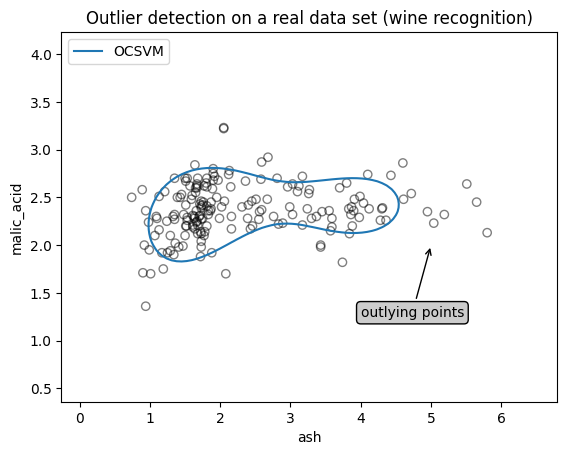

In [141]:
fig, ax = plt.subplots()

legend_lines = []

for color, (name, estimator) in zip(colors, estimators.items()):
	estimator.fit(X)
	DecisionBoundaryDisplay.from_estimator(
		estimator,
		X,
		response_method="decision_function",
		plot_method="contour",
		levels=[0],
		colors=color,
		ax=ax
	)
	legend_lines.append(mlines.Line2D([], [], color=color, label=name))

ax.scatter(X[:, 0], X[:, 1], edgecolor="black", color="none", alpha=0.5)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
	"outlying points",
	xy=(5, 2),
	xycoords="data",
	textcoords="data",
	xytext=(4, 1.25),
	bbox=bbox_args,
	arrowprops=arrow_args
)

ax.legend(handles=legend_lines, loc="upper left")
_ = ax.set(
	xlabel="ash",
	ylabel="malic_acid",
	title="Outlier detection on a real data set (wine recognition)"
)

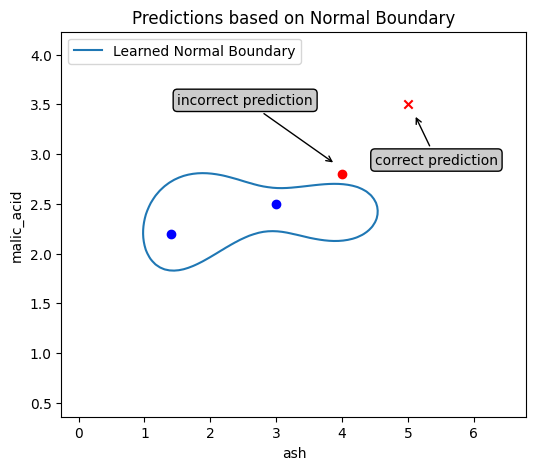

In [142]:
x_test = np.array([
    [1.4, 2.2],
    [3, 2.5],
    [4, 2.8],
    [5, 3.5]
])

y_test = [1, 1, 1 -1]
y_markers = ["o", "o", "o", "x"]

legend_lines = []
plt.figure(figsize=(6, 5))
ax = plt.gca()

for color, (name, estimator) in zip(colors, estimators.items()):
	DecisionBoundaryDisplay.from_estimator(
		estimator,
		X,
		response_method="decision_function",
		plot_method="contour",
		levels=[0],
		colors=color,
		ax=ax
	)
    
y_hat = model.predict(x_test)
y_hat_colors = ["none", "blue", "red"]

for yh, m, x1, x2 in zip(y_hat, y_markers, x_test[:, 0], x_test[:, 1]):
	plt.scatter(x1, x2, marker=m, color=y_hat_colors[yh])
    
legend_lines.append(mlines.Line2D([], [], color=color, label="Learned Normal Boundary"))

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
	"correct prediction",
	xy=(5 + 0.1, 3.5 - 0.1),
	xycoords="data",
	textcoords="data",
	xytext=(4.5, 2.9),
	bbox=bbox_args,
	arrowprops=arrow_args
)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
	"incorrect prediction",
	xy=(4 - 0.1, 2.8 + 0.1),
	xycoords="data",
	textcoords="data",
	xytext=(1.5, 3.5),
	bbox=bbox_args,
	arrowprops=arrow_args
)

ax.legend(handles=legend_lines, loc="upper left")
_ = ax.set(
	xlabel="ash",
	ylabel="malic_acid",
	title="Predictions based on Normal Boundary"
)